In [ ]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_dir="/content/drive/MyDrive/Project/train"
test_dir="/content/drive/MyDrive/Project/test"

In [ ]:
import tensorflow as tf
import numpy as np
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
#base_dir=r"D:\PES-5\MI\project\classification\data\train"

In [ ]:
IMAGE_SIZE=224
BATCH_SIZE=64

#pre=processing
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.1
    )

test_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
     rescale=1./255,
     validation_split=0.1
)

train_datagen=train_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='training'
)

test_datagen=test_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)

Found 642 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


In [ ]:
train_datagen.class_indices

{'adidas': 0, 'converse': 1, 'nike': 2}

In [ ]:
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',strides=2,kernel_size=3,activation='relu',input_shape=(224,224,3)))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,padding='same',strides=2,kernel_size=3,activation='relu'))
cnn.add(BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(3,activation='softmax'))

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=cnn.fit(train_datagen,epochs=30,validation_data=test_datagen)

Epoch 1/30
11/11 [==============================] - 25s 2s/step - loss: 1.8568 - accuracy: 0.3910 - val_loss: 1.0933 - val_accuracy: 0.3623
Epoch 2/30
11/11 [==============================] - 18s 2s/step - loss: 1.5009 - accuracy: 0.3972 - val_loss: 1.0928 - val_accuracy: 0.3623
Epoch 3/30
11/11 [==============================] - 18s 2s/step - loss: 1.2363 - accuracy: 0.4938 - val_loss: 1.1000 - val_accuracy: 0.4058
Epoch 4/30
11/11 [==============================] - 19s 2s/step - loss: 1.1997 - accuracy: 0.4907 - val_loss: 1.0912 - val_accuracy: 0.3913
Epoch 5/30
11/11 [==============================] - 18s 2s/step - loss: 1.1471 - accuracy: 0.5483 - val_loss: 1.1207 - val_accuracy: 0.3478
Epoch 6/30
11/11 [==============================] - 18s 2s/step - loss: 0.9938 - accuracy: 0.5701 - val_loss: 1.1276 - val_accuracy: 0.3768
Epoch 7/30
11/11 [==============================] - 18s 2s/step - loss: 0.9196 - accuracy: 0.5966 - val_loss: 1.1382 - val_accuracy: 0.3768
Epoch 8/30
11/11 [==

In [ ]:
import matplotlib.pyplot as plt

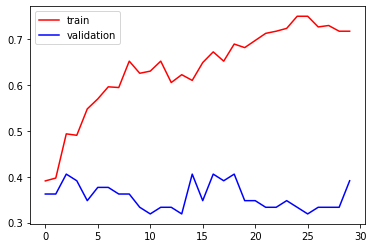

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

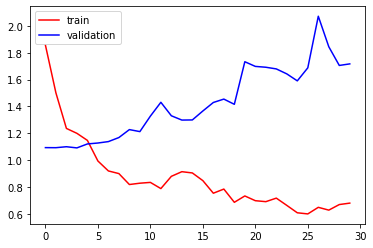

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/drive/MyDrive/Project/test/nike/18.jpg')

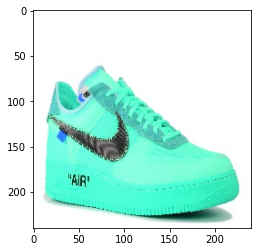

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(240, 240, 3)

In [ ]:
test_img = cv2.resize(test_img,(224,224))

In [ ]:
test_input = test_img.reshape((1,224,224,3))

In [ ]:
cnn.predict(test_input)

1/1 [==============================] - 0s 114ms/step


array([[0., 0., 1.]], dtype=float32)